In [1]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

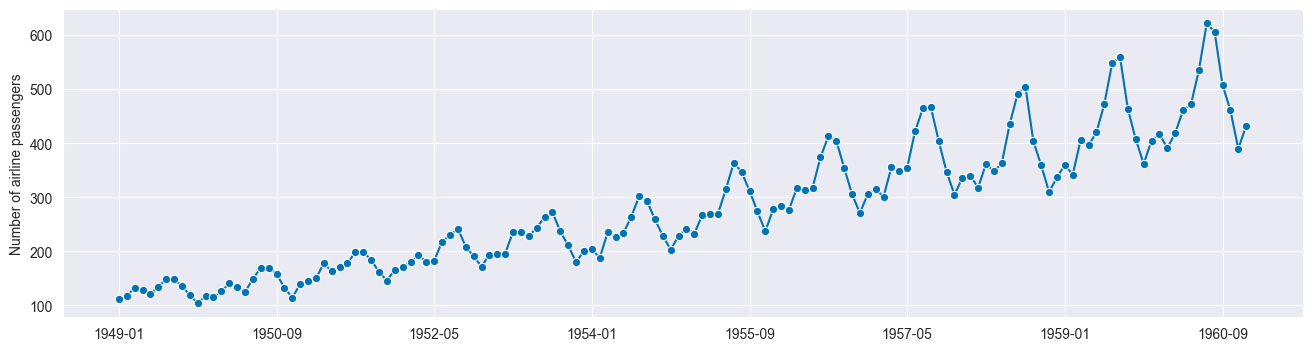

In [2]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [5]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
cutoff = pd.Period("1960-12", freq="M")

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

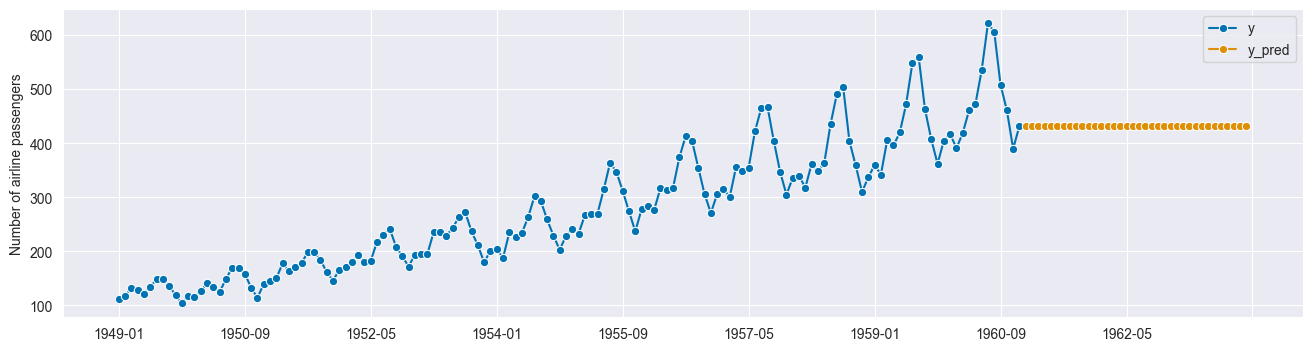

In [6]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

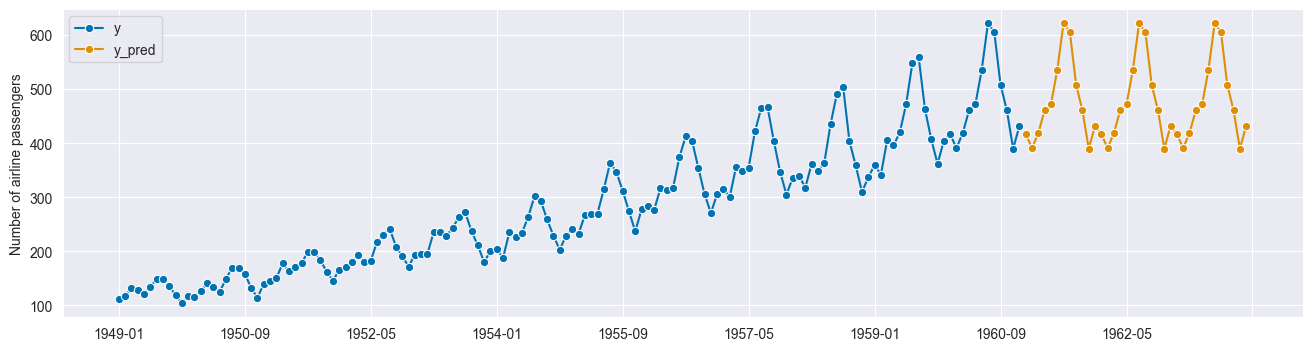

In [7]:
# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y, fh=fh)
y_pred = forecaster.predict()
plot_series(y, y_pred, labels=["y", "y_pred"])

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

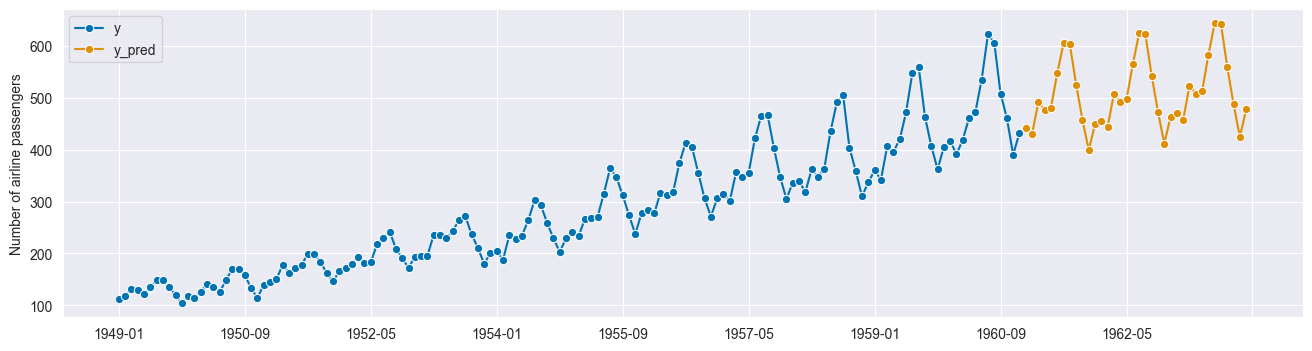

In [8]:
from sktime.forecasting.theta import ThetaForecaster

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y, fh=fh)
y_pred=forecaster.predict()
plot_series(y, y_pred, labels=["y", "y_pred"])

In [44]:
from sktime.datasets import load_airline
from sktime.forecasting.ets import AutoETS


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

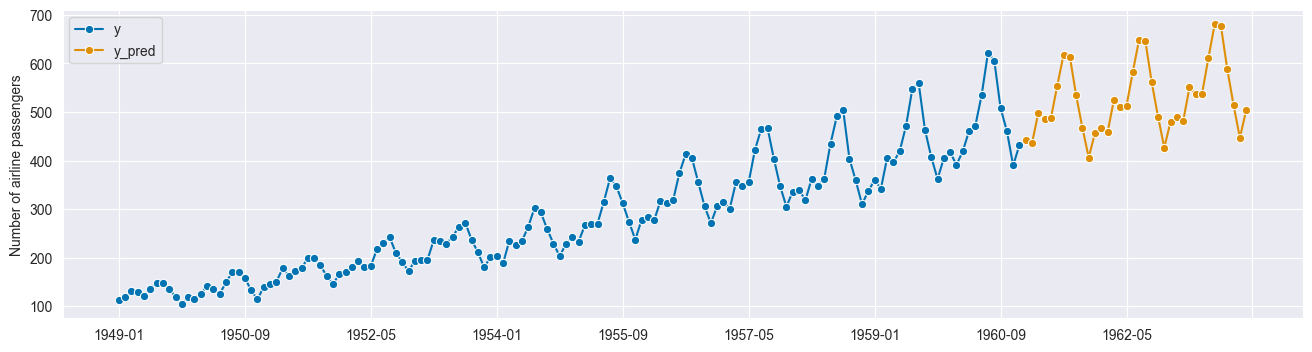

In [9]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(y, fh=fh)
y_pred=forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])

D:\Python\Anaconda3-2022.05\envs\ipredict\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python\Anaconda3-2022.05\envs\ipredict\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python\Anaconda3-2022.05\envs\ipredict\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python\Anaconda3-2022.05\envs\ipredict\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python\Anaconda3-2022.05\envs

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

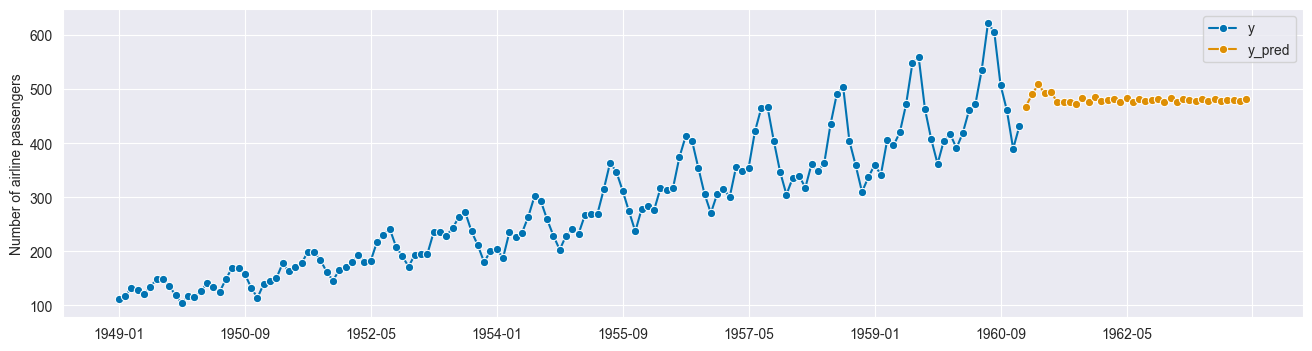

In [10]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA()
forecaster.fit(y, fh=fh)
y_pred=forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])